In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import seaborn as sns

# ------------------------
# Set random seed
# ------------------------
SEED = 42
np.random.seed(SEED)

# ------------------------
# Generate Data
# ------------------------
X_inliers, _ = make_gaussian_quantiles(cov=2., n_samples=300, n_features=2, random_state=SEED)
X_outliers = np.random.uniform(low=-8, high=8, size=(20, 2))  # deterministic with fixed seed
X = np.vstack([X_inliers, X_outliers])
y_true = np.hstack([np.ones(len(X_inliers)), -np.ones(len(X_outliers))])  # 1 = inlier, -1 = outlier

# ------------------------
# Define Models
# ------------------------
models = {
    "Isolation Forest": IsolationForest(contamination=0.06, random_state=SEED),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination=0.06, novelty=False),
}

## a) Please insert your code (cell below) to compute the average precision according to the definition from the lecture. Please also see the code below for your information on how scores (for ranking) are obtained.

In [21]:

# ------------------------
# Average Precision Function
# ------------------------
def compute_ap_from_ranking(y_true, scores):
    # params:
    # y_true are data point labels containing either -1 (outlier) or 1 (inlier)
    # scores are outlier scores returned either by IF or LOF
    # ap means Average Precision
    # adjusted_ap means average precision adjusted to a random chance
    return ap, adjusted_ap



Isolation Forest
  AP        = 0.8647
  Adjusted AP (vs random) = 0.8557
----------------------------------------
Local Outlier Factor
  AP        = 0.8416
  Adjusted AP (vs random) = 0.8310
----------------------------------------


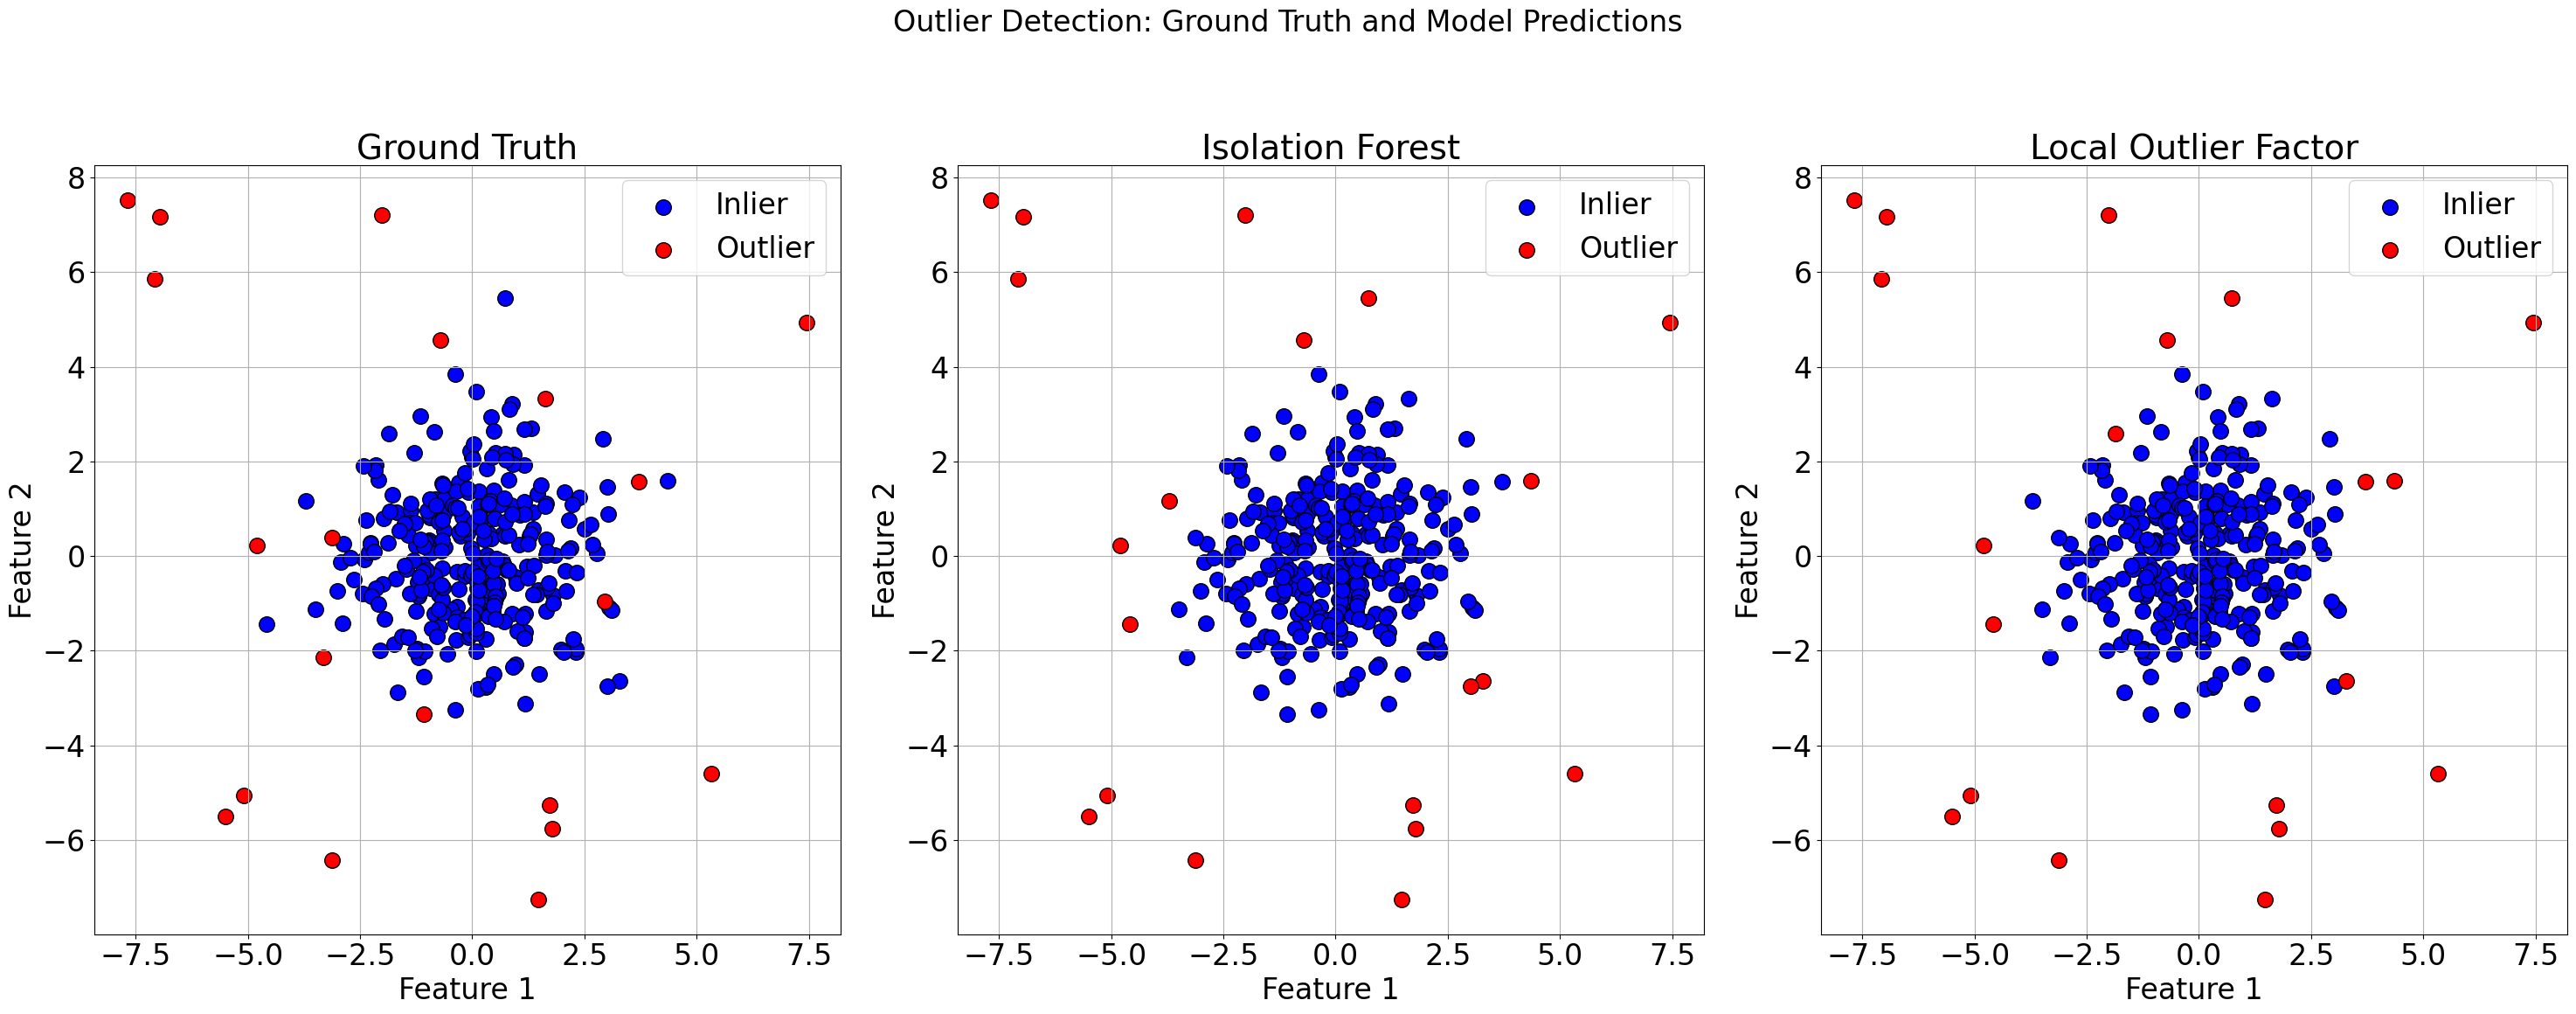

In [22]:
# ------------------------
# Visualization and AP Calculation
# ------------------------

plt.rcParams.update({
    'font.size': 24,        # Base font size
    'axes.titlesize': 28,   # Title size of individual plots
    'axes.labelsize': 24,   # Axis label font size
    'xtick.labelsize': 24,  # Tick label font sizes
    'ytick.labelsize': 24,
    'legend.fontsize': 24,  # Legend text size
})

fig, axes = plt.subplots(1, len(models)+1, figsize=(30, 12))

# Plot Ground Truth
ax = axes[0]
ax.scatter(X[y_true == 1][:, 0], X[y_true == 1][:, 1], color='blue', label="Inlier", edgecolor='k', s=160)
ax.scatter(X[y_true == -1][:, 0], X[y_true == -1][:, 1], color='red', label="Outlier", edgecolor='k', s=160)
ax.set_title("Ground Truth")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()
ax.grid(True)

# Process Each Model
for ax, (name, model) in zip(axes[1:], models.items()):
    if name == "Local Outlier Factor":
        y_pred_raw = model.fit_predict(X)
        scores = -model.negative_outlier_factor_ # converting to positive values (higher -> outlier)
    else:
        y_pred_raw = model.fit_predict(X)
        scores = -model.decision_function(X) # converting to positive values (higher -> outlier)

    ax.scatter(X[y_pred_raw == 1][:, 0], X[y_pred_raw == 1][:, 1], color='blue', label="Inlier", edgecolor='k', s=160)
    ax.scatter(X[y_pred_raw == -1][:, 0], X[y_pred_raw == -1][:, 1], color='red', label="Outlier", edgecolor='k', s=160)
    ax.set_title(name)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()
    ax.grid(True)

    # Compute Average Precision
    ap, adj_ap = compute_ap_from_ranking(y_true, scores)
    print(f"{name}")
    print(f"  AP        = {ap:.4f}")
    print(f"  Adjusted AP (vs random) = {adj_ap:.4f}")
    print("-" * 40)

plt.suptitle("Outlier Detection: Ground Truth and Model Predictions", fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## b) Working on real data - please run the three cells below to make yourself familiar with white wine quality data.

In [4]:
# ------------------------
# 1. Load Dataset
# ------------------------

# Load the white wine dataset (download it from UCI if needed)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())



Shape: (4898, 12)
Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0   

[6 5 7 8 4 3 9]


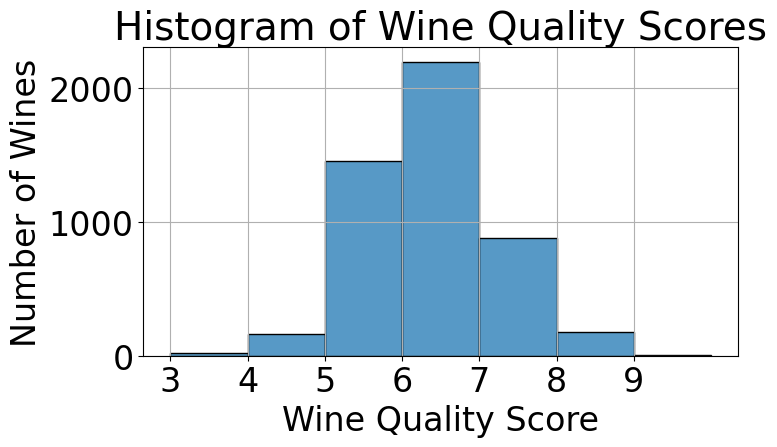

In [5]:
# Unique quality values in the dataset
print(df["quality"].unique())

plt.figure(figsize=(8, 5))
sns.histplot(df['quality'], bins=range(df['quality'].min(), df['quality'].max() + 2), kde=False)
plt.title("Histogram of Wine Quality Scores")
plt.xlabel("Wine Quality Score")
plt.ylabel("Number of Wines")
plt.xticks(range(df['quality'].min(), df['quality'].max() + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

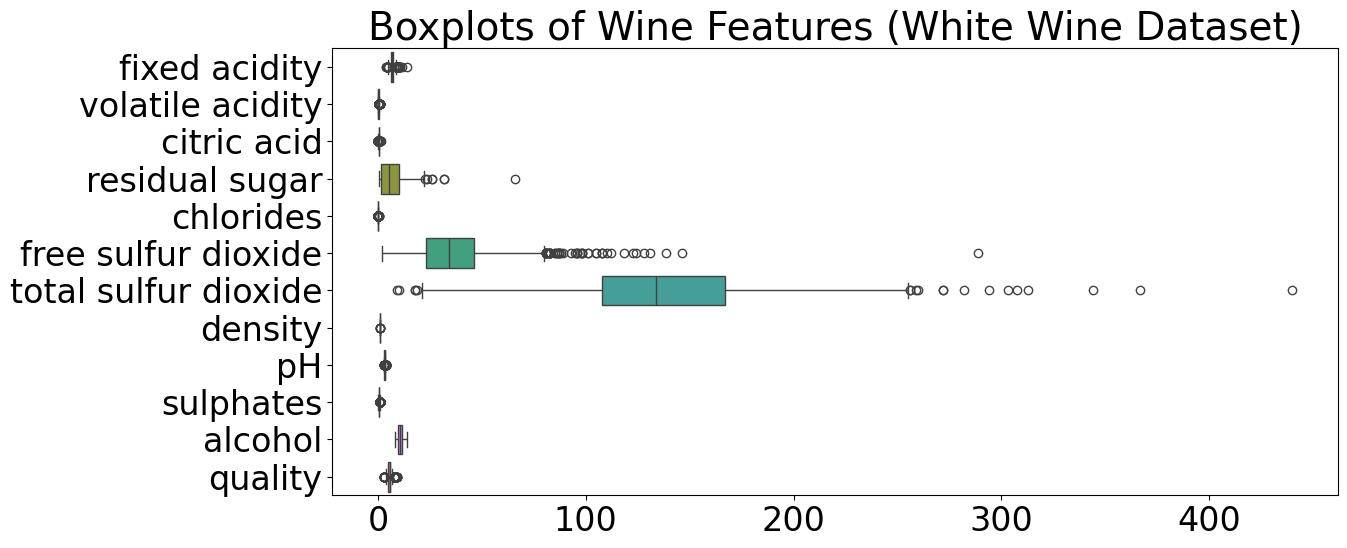

Number of true outliers: 363


In [6]:
# ------------------------
# 2. Visualize Features via Boxplot
# ------------------------
plt.figure().clf() 
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots of Wine Features (White Wine Dataset)")
plt.tight_layout()
plt.show()

# ------------------------
# 3. Preprocess: Scale Features
# ------------------------

X = df.drop(columns=['quality'])  # features only
y_quality = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------
# 4. Defining "True" outliers as wines with high or low quality
# ------------------------
# We'll define "true outliers" as wines with extreme quality (e.g., quality <= 4 or >= 8)

df['true_outlier'] = df['quality'].apply(lambda q: -1 if q <= 4 or q >= 8 else 1)
y_true = df['true_outlier'].values
print("Number of true outliers:", np.sum(y_true==-1))

## c) Please insert the code to run PCA and visualise it. Build two plots - on one the data points are labeled by quality, on another by outlier. What do you observe?

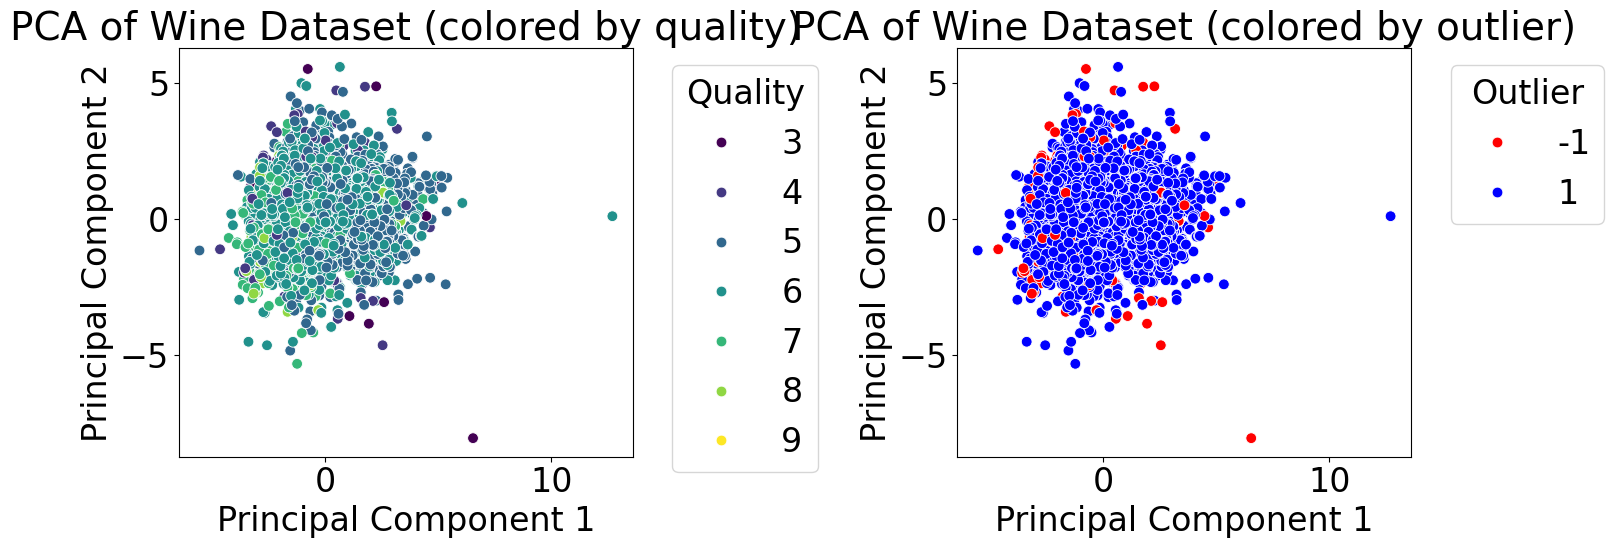

In [7]:
# running PCA 
# making PCA plots
# your code

## d) In the cell below run Isoltion Forest and Local Outlier Factor method and estimate their performances using the Average Precision function that you provided before. Print out the estimates. What can we conclude from the estimates?

In [9]:
models = {
    "IF": IsolationForest(contamination=0.06, random_state=42),
    "LOF": LocalOutlierFactor(n_neighbors=20, contamination=0.06, novelty=False),
}

# ------------------------
# Apply models + store results
# ------------------------

results = {} # dictionary for each model such as:
#   results[name] = {
#         'scores': scores,
#         'preds': preds_raw,
#     }
# use this dictionary 

# !!!
# Your code 
# Hint - loop over models as it was done before.

== Average Precision (Lecture Definition) ==
IF                     | AP: 0.1253 | Adjusted AP: 0.0553
LOF                    | AP: 0.1154 | Adjusted AP: 0.0446


## e) Visualize the outlier detection result (labeling of data points on PCA plot) using three plots: groundtruth, results from Isolation Forest and results from LOF. What do you observe?

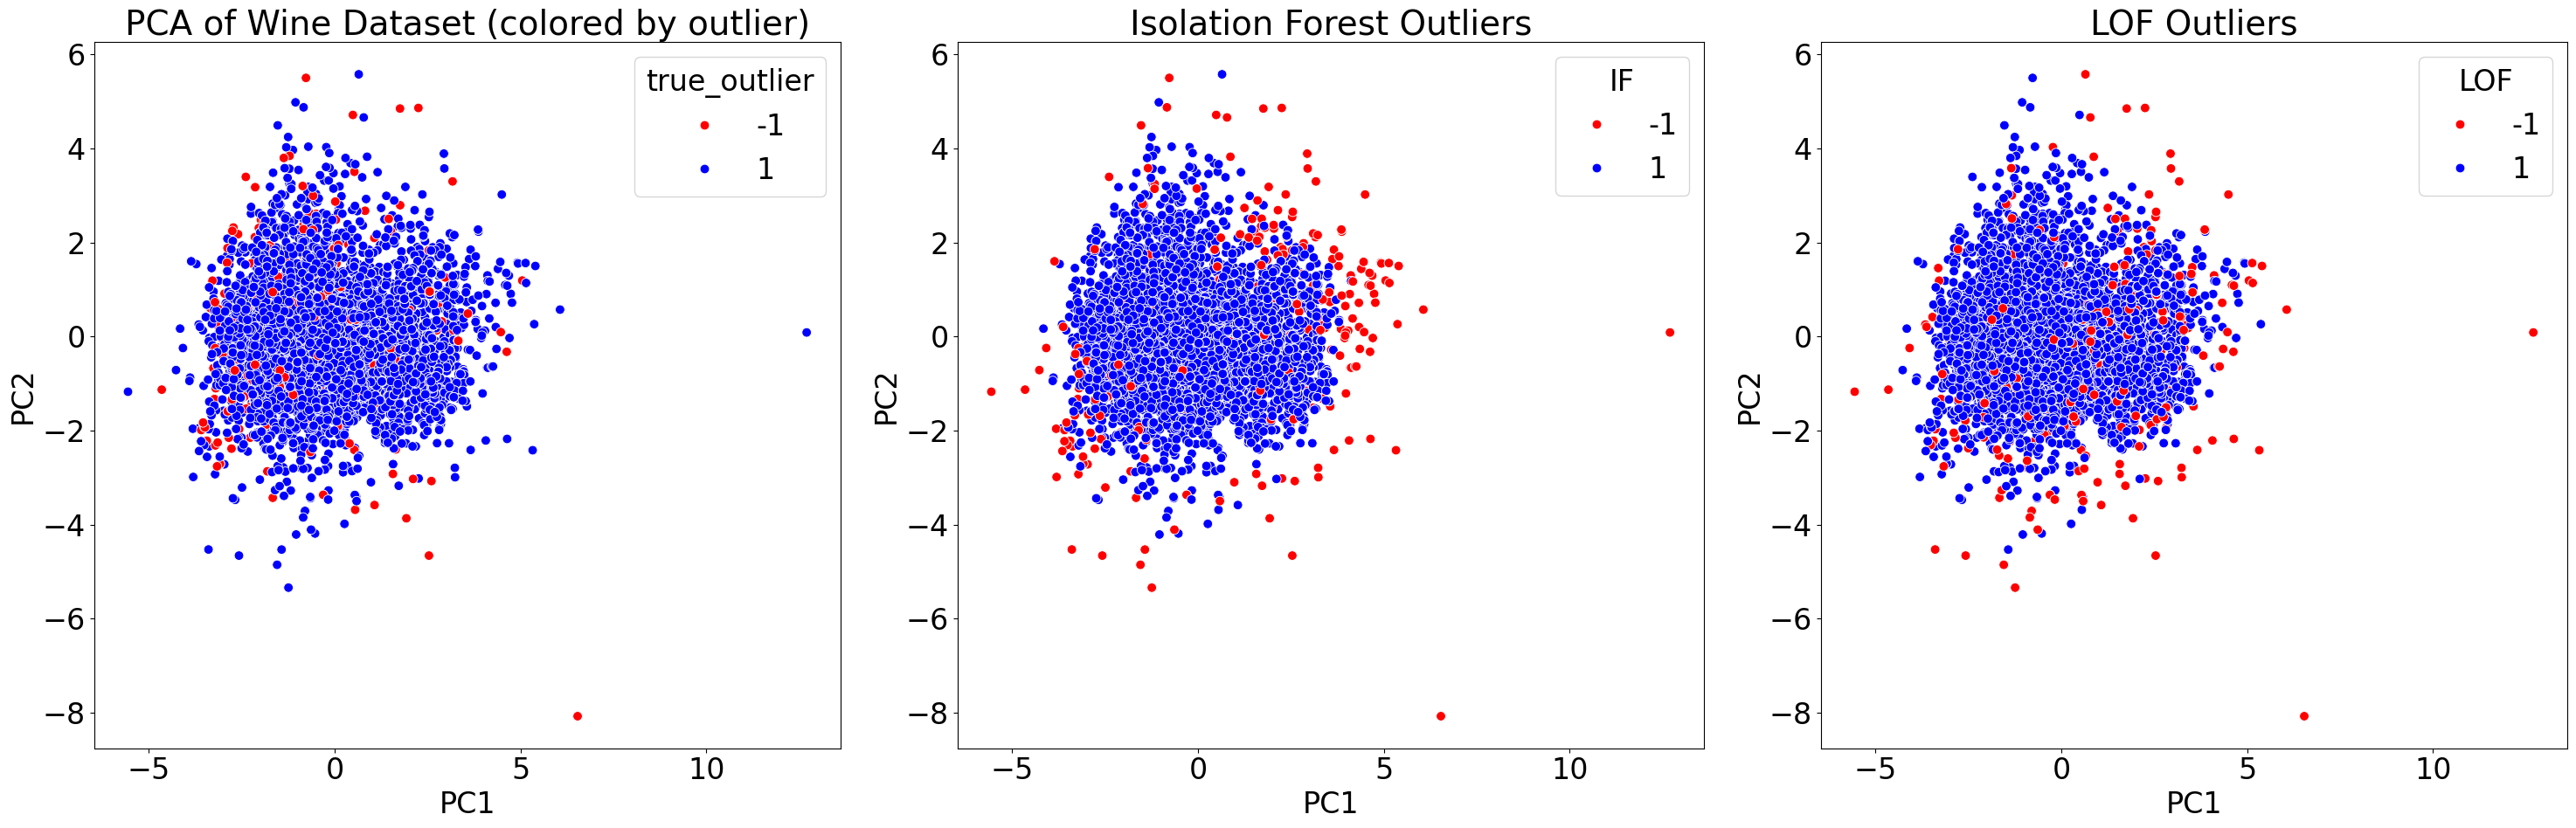

In [13]:
# Add model predictions to df for visualization
for name in models.keys():
    df[name] = results[name]['preds']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# your code
# Plot 1: By true_outlier label

# Plot 2: Isolation Forest

# Plot 3: Local Outlier Factor

